In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn
#use pandas for data handling and analysis
#numpy for numerical operations and array support
#matplotlib & seaborn for data visualization
#scikit-learn for building and evaluating ml models.

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#use pd,np are common aliases for padas and numpy
#use plt and sns are used for creating plots and visualizations

In [3]:
df = pd.read_csv('stroke_data_set.csv') #loads the dataset in to pandas DataFrame named df

In [4]:
print(df.head())  #shows the first 5 rows of the dataset.

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [5]:
print(df.info()) #gives the summary of the DataFrame
#(Useful to identify missing values and understand what type of data you are dealing with)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [7]:
df.describe() #Provides descriptive statistics for numerical columns in the dataset

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
#Univariate_non-graphical_EDA-Gender
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [9]:
#Univariate_non-graphical_EDA-Marital Staus
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [10]:
#Univariate_non-graphical_EDA-Work Type
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [11]:
#Univariate_non-graphical_EDA-Stroke
df['stroke'].value_counts() #help to understand how age is distributed and see if it's skewed or normally distributed

stroke
0    4861
1     249
Name: count, dtype: int64

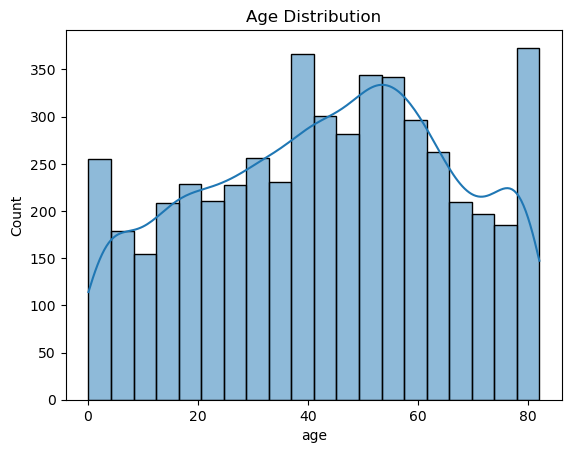

In [12]:
#UNIVARIATE_GRAPHICAL_EDA-Age Distribution
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

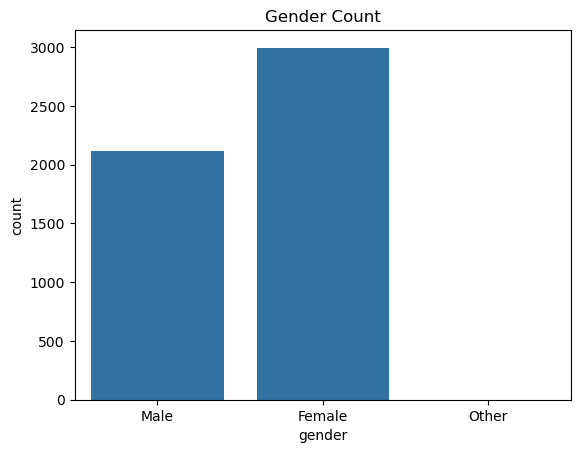

In [13]:
# Count plot for 'gender'
sns.countplot(x='gender', data=df)
plt.title("Gender Count")
plt.show()

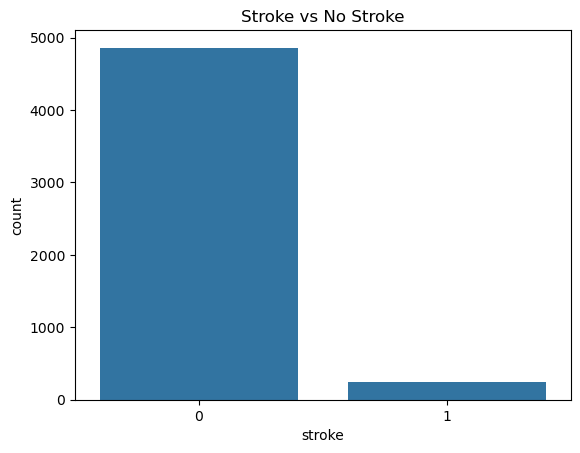

In [14]:
# Count plot for 'stroke'
sns.countplot(x='stroke', data=df)
plt.title("Stroke vs No Stroke")
plt.show()

In [16]:
#MULTIVARIATE NON-GRAPHICAL EDA
#Crosstab: stroke vs smoking_status
pd.crosstab(df['stroke'], df['smoking_status'], normalize='index')

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
0,0.307961,0.167661,0.370706,0.153672
1,0.188755,0.281124,0.361446,0.168675


In [17]:
# Correlation matrix for numerical features
# Computes Pearson correlation coefficients between numeric features
df[['age', 'bmi', 'avg_glucose_level', 'stroke']].corr()

,age,bmi,avg_glucose_level,stroke
age,1.000000,0.333398,0.238171,0.245257
bmi,0.333398,1.000000,0.175502,0.042374
avg_glucose_level,0.238171,0.175502,1.000000,0.131945
stroke,0.245257,0.042374,0.131945,1.000000


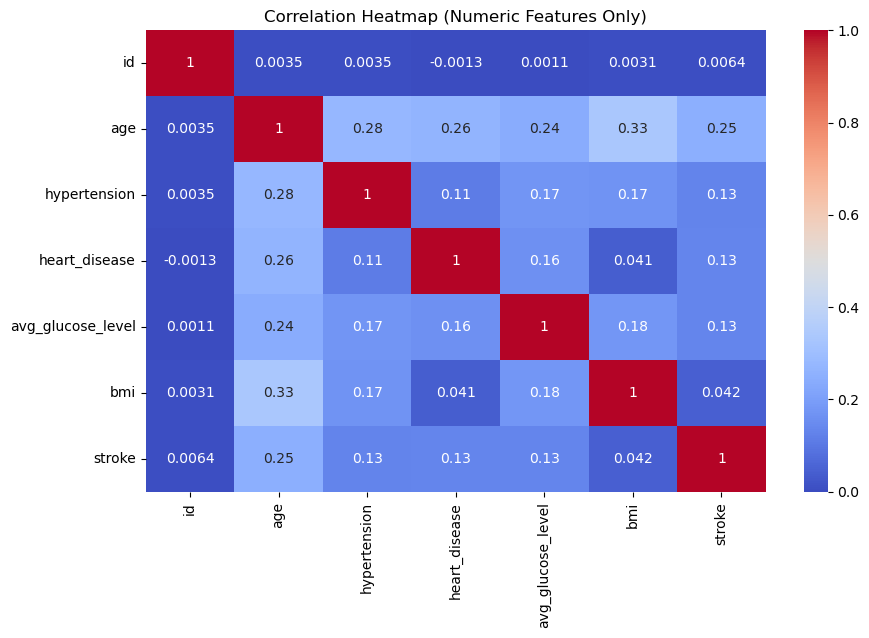

In [19]:
#  MULTIVARIATE GRAPHICAL EDA
#Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
#  Heatmap of correlations (only numeric columns)
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

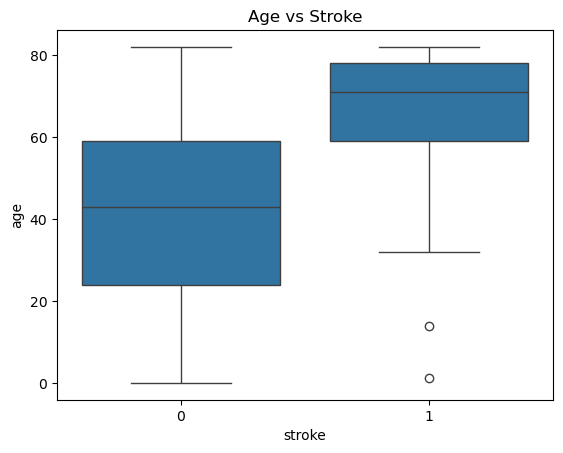

In [21]:
#  Boxplot: age vs stroke
sns.boxplot(x='stroke', y='age', data=df)
plt.title("Age vs Stroke")
plt.show()

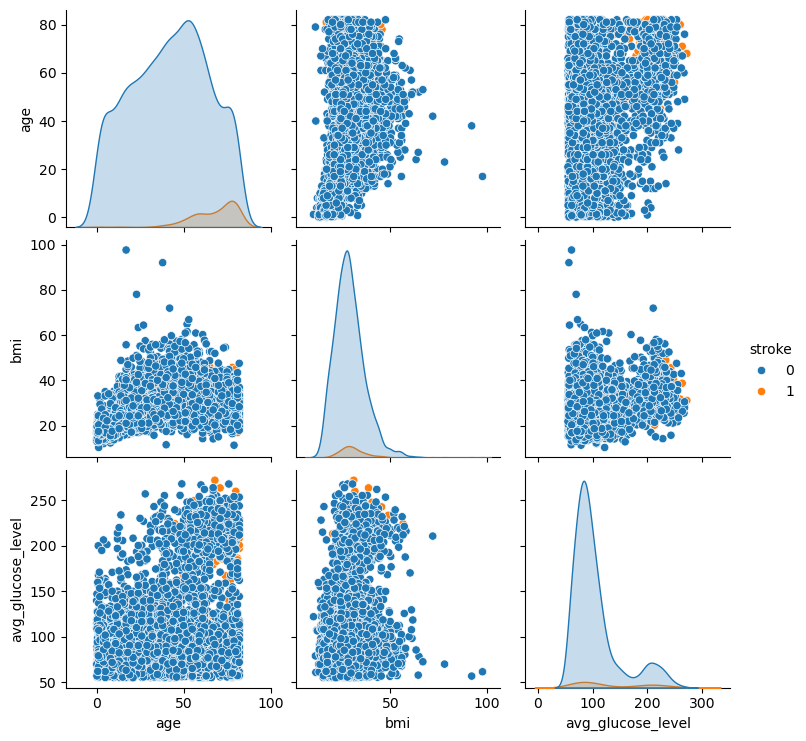

In [23]:
#  Pairplot for selected features
sns.pairplot(df[['age', 'bmi', 'avg_glucose_level', 'stroke']], hue='stroke')
plt.show()

In [26]:
#DATA PREPROCESSING
#handling missing data(1)
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [28]:
#  Fill missing BMI with mean
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

/var/folders/j0/8nh99kqj7ns__1nx2yjvdpnc0000gn/T/ipykernel_2848/3322314330.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [30]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [31]:
#Encode Categorical Variables(2)
from sklearn.preprocessing import LabelEncoder

In [36]:
#  Label Encoding for binary categorical columns
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])        # Male=1, Female=0 (or other depending on data)
df['ever_married'] = le.fit_transform(df['ever_married'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])

In [46]:
print(df.columns.tolist())

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


In [47]:
#  One-hot encoding for other categorical features
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)

KeyError: "None of [Index(['work_type', 'smoking_status'], dtype='object')] are in the [columns]"

In [49]:
#Scale Numeric Features(3)
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

In [51]:
#Split the data(4)
from sklearn.model_selection import train_test_split

In [52]:
# Separate features and label
X = df.drop('stroke', axis=1)
y = df['stroke']

In [53]:
#  Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
#MODEL FITTING-LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [57]:
# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [59]:
# Predict on test set
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

In [60]:
#EVALUATION – LOGISTIC REGRESSION
#  Classification Report
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022



In [61]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Confusion Matrix:
 [[972   0]
 [ 49   1]]


In [62]:
#  Accuracy & ROC-AUC
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lr))

Accuracy: 0.952054794520548
ROC-AUC Score: 0.8404115226337449


In [63]:
#MODEL FITTING – RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

In [64]:
#  Initialize and train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
#  Predict
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [66]:
#EVALUATION – RANDOM FOREST
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022



In [67]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
 [[972   0]
 [ 49   1]]


In [69]:
# Accuracy & ROC-AUC
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

Accuracy: 0.952054794520548
ROC-AUC Score: 0.8108333333333333


In [ ]:
# 3. Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:, 1]
 
print("Gradient Boosting Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_gb))
 

 

Gradient Boosting Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.14      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.55      0.51      0.50      1022
weighted avg       0.91      0.95      0.93      1022

Confusion Matrix:
 [[966   6]
 [ 49   1]]
Accuracy: 0.9461839530332681
ROC-AUC Score: 0.8209053497942387


In [86]:
#MODEL FITTING-KNN
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

In [87]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [88]:
import numpy as np

# Ensure X_test is a NumPy array with correct dtype
X_test_knn = np.array(X_test).astype(np.float64)

# Predict
y_pred_knn = knn.predict(X_test_knn)
y_prob_knn = knn.predict_proba(X_test_knn)[:, 1]

# Evaluation
print("KNN Classifier Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_knn))



KNN Classifier Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Confusion Matrix:
 [[972   0]
 [ 50   0]]
Accuracy: 0.9510763209393346
ROC-AUC Score: 0.5155761316872428


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]
 
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_dt))

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       972
           1       0.17      0.18      0.17        50

    accuracy                           0.92      1022
   macro avg       0.56      0.57      0.57      1022
weighted avg       0.92      0.92      0.92      1022

Confusion Matrix:
 [[928  44]
 [ 41   9]]
Accuracy: 0.9168297455968689
ROC-AUC Score: 0.5673662551440329


In [93]:
# Model names
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'KNN', 'Decision Tree']

# Accuracy scores
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_gb),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_dt)
]

# ROC-AUC scores
roc_aucs = [
    roc_auc_score(y_test, y_prob_lr),
    roc_auc_score(y_test, y_prob_rf),
    roc_auc_score(y_test, y_prob_gb),
    roc_auc_score(y_test, y_prob_knn),
    roc_auc_score(y_test, y_prob_dt)
]

# Print comparison
for i in range(len(models)):
    print(f"{models[i]} - Accuracy: {accuracies[i]:.4f} | ROC-AUC: {roc_aucs[i]:.4f}")


Logistic Regression - Accuracy: 0.9521 | ROC-AUC: 0.8404
Random Forest - Accuracy: 0.9521 | ROC-AUC: 0.8108
Gradient Boosting - Accuracy: 0.9462 | ROC-AUC: 0.8209
KNN - Accuracy: 0.9511 | ROC-AUC: 0.5156
Decision Tree - Accuracy: 0.9168 | ROC-AUC: 0.5674


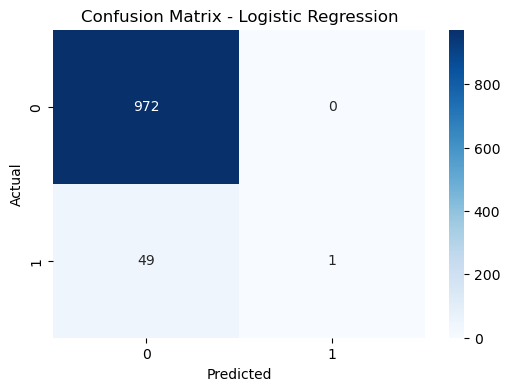

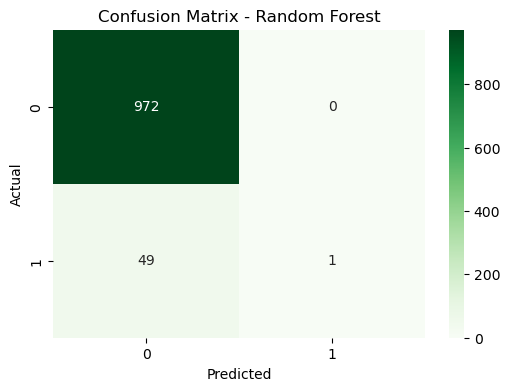

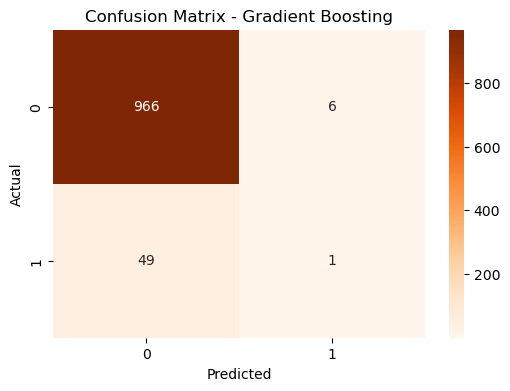

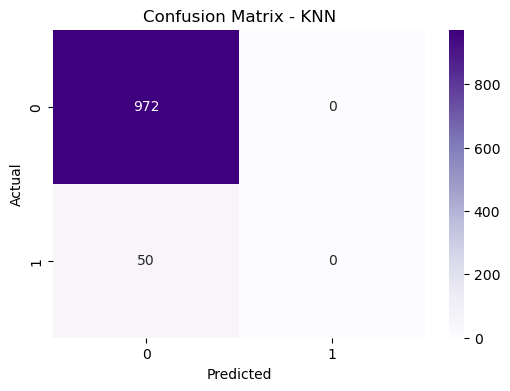

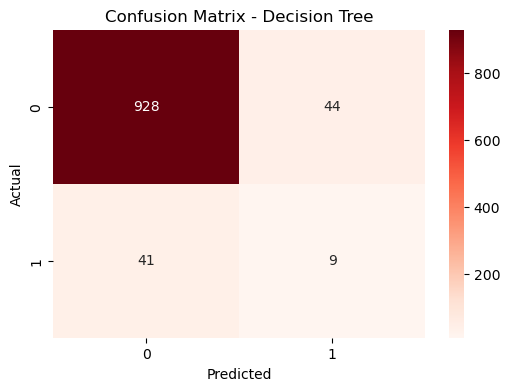

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Random Forest
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Gradient Boosting
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for KNN
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Decision Tree
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


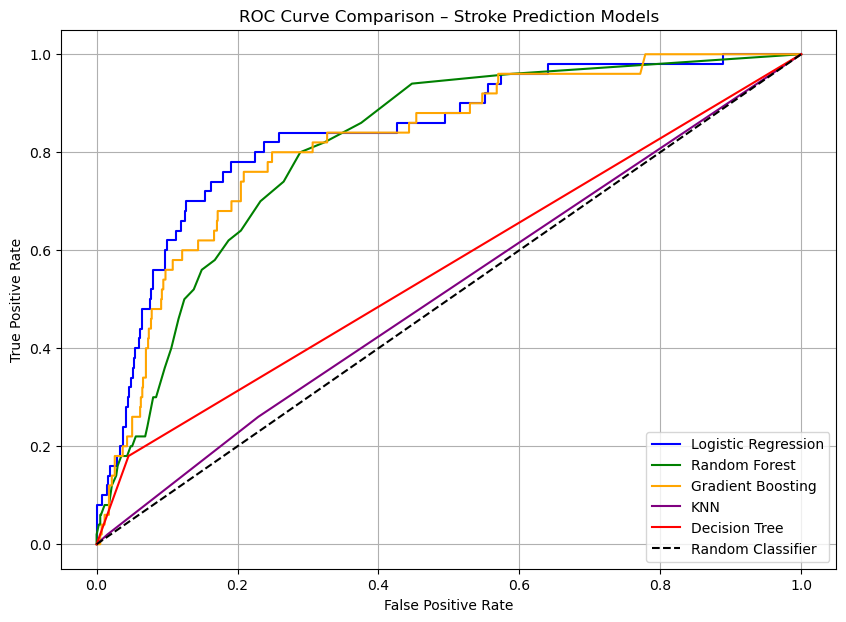

In [96]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# ROC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

# ROC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# ROC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_gb)

# ROC for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

# ROC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_dt)

# Plot all ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression', color='blue')
plt.plot(fpr_rf, tpr_rf, label='Random Forest', color='green')
plt.plot(fpr_xgb, tpr_xgb, label='Gradient Boosting', color='orange')
plt.plot(fpr_knn, tpr_knn, label='KNN', color='purple')
plt.plot(fpr_svm, tpr_svm, label='Decision Tree', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison – Stroke Prediction Models')
plt.legend()
plt.grid(True)
plt.show()


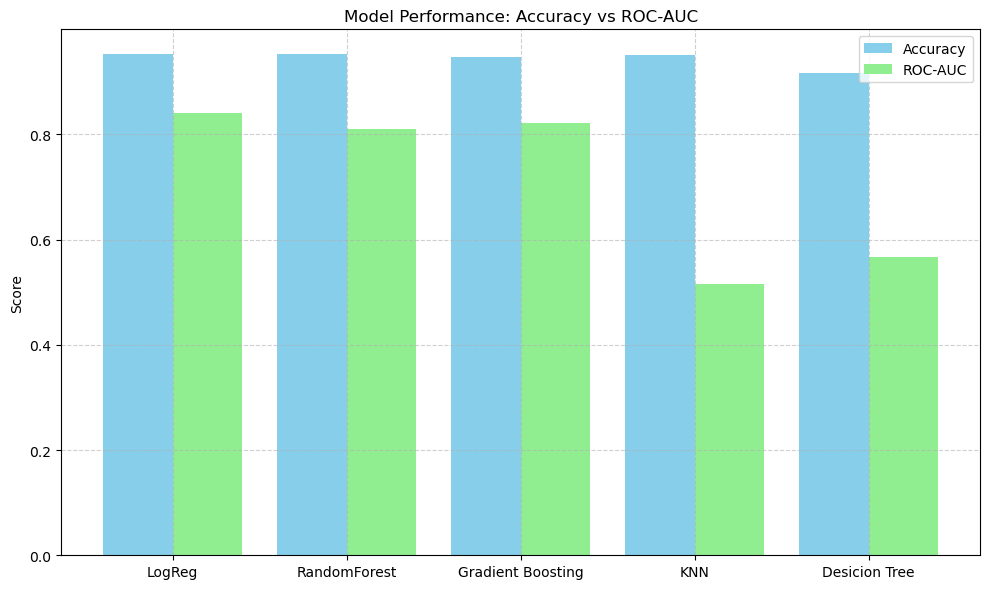

In [97]:
import matplotlib.pyplot as plt

# Model names
models = ['LogReg', 'RandomForest', 'Gradient Boosting', 'KNN', 'Desicion Tree']

# Accuracy & ROC-AUC (from your earlier evaluation)
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_gb),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_dt)
]

roc_aucs = [
    roc_auc_score(y_test, y_prob_lr),
    roc_auc_score(y_test, y_prob_rf),
    roc_auc_score(y_test, y_prob_gb),
    roc_auc_score(y_test, y_prob_knn),
    roc_auc_score(y_test, y_prob_dt)
]

#  Bar plot
x = range(len(models))
plt.figure(figsize=(10, 6))
plt.bar(x, accuracies, width=0.4, label='Accuracy', align='center', color='skyblue')
plt.bar([i + 0.4 for i in x], roc_aucs, width=0.4, label='ROC-AUC', align='center', color='lightgreen')

plt.xticks([i + 0.2 for i in x], models)
plt.ylabel("Score")
plt.title("Model Performance: Accuracy vs ROC-AUC")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [98]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [99]:
import joblib

In [109]:
joblib.dump(rf, "best_best_model_rf.pkl")

['best_best_model_rf.pkl']

In [ ]:
STROKE PREDICTION USING MACHINE LEARNING: ANALYSIS AND CLINICAL INTERPRETATION
Stroke is one of the major causes of death and long-term disability worldwide. Being able to spot people who may be at risk can 
make a major difference, as early treatment often prevents serious damage. With hospitals collecting more digital health 
information, machine learning has become a useful way to identify who may be more likely to experience a stroke. This essay
looks at a stroke dataset, compares five prediction models, and discusses what the results could mean in a real medical setting.


DATA OVERVIEW
The dataset contains common patient details, including age, gender, BMI, glucose level, marital status, work type, where the
person lives, and smoking habits. The target variable shows whether the patient has ever had a stroke. A quick look at the data 
showed some clear patterns:

- Age had the strongest link to stroke risk, especially among people between 40 and 70.

- The number of males and females affected was similar.

- Stroke cases were very rare, which created an imbalanced dataset.

- Some BMI values were missing and had to be filled in.

- These findings shaped the way the models were prepared and trained.


METHODOLOGY
I trained and tested five machine learning models to predict stroke risk:

1. Logistic Regression – a simple model that shows how each factor influences stroke risk.

2. Decision Tree – easy to read but often overfits and can miss general patterns.

3. Random Forest – combines many trees to improve accuracy and stability.

4. Gradient Boosting – builds trees step-by-step to fix errors from previous ones.

5. KNN with SMOTE – uses oversampling to help the model learn from the minority class.


Before training, the data was cleaned, missing values were handled, categorical features were encoded, numeric features were 
scaled, and class imbalance was addressed using either weights or SMOTE. The dataset was split into training and testing sets 
for fair evaluation. 
 

MODEL EVALUATION AND COMPARISON
All models were measured using accuracy, precision, recall, F1-score, and ROC-AUC. Because missing a high-risk patient can have 
serious consequences, recall was treated as the most important measure.

1. Logistic Regression and Decision Trees were easy to understand but missed several stroke cases.

2. KNN with SMOTE improved performance but remained sensitive to noisy data.

3. Gradient Boosting performed well overall but had slightly lower recall.

4. Random Forest showed the best balance across all metrics and offered strong, consistent recall.

The ensemble models clearly outperformed the simpler ones. 


CLINICAL INTERPRETATION
In a healthcare environment, failing to identify someone at risk is far more harmful than issuing a false alarm. Because of its
high recall and stable performance, Random Forest appears to be the safest option for early stroke-risk prediction. While simpler
 models are easier to explain, their lower recall makes them less reliable for real-world clinical use.


CONCLUSION
Machine learning can play a helpful role in early stroke detection by analyzing patterns in patient information. Of the models 
tested, Random Forest provided the most dependable results, offering a strong mix of accuracy, recall, and stability. Overall, 
ensemble models were the most effective, as they capture patterns that single models often miss. Future work could involve adding
more clinical features, improving methods for handling imbalanced data, or combining ensemble techniques to further strengthen
 prediction reliability.